In [12]:


%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (350, 350)
IPythonConsole.drawOptions.addAtomIndices = True
from openchemie import OpenChemIE
from PIL import Image
import numpy as np
from rdkit.Chem import AllChem
import cv2
import re
import torch
from openchemie import utils



import json
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
model = OpenChemIE(device = torch.device('cuda'))

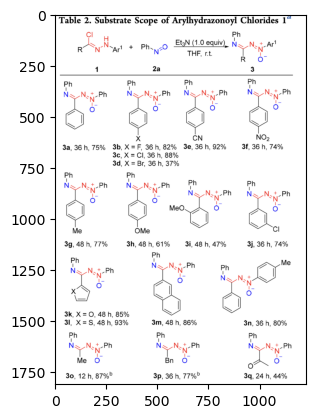

In [14]:
file_name = 'acs.joc.3c01427 example 1.png'

image_file = '../data/' + file_name

image = Image.open(image_file)

image_np = np.array(image)

plt.imshow(image_np)
plt.show()

In [15]:
results = model.extract_reactions_from_figures([image_np])

coref_results = model.extract_molecule_corefs_from_figures([image_np])

Inspect the RxnScribe Outputs

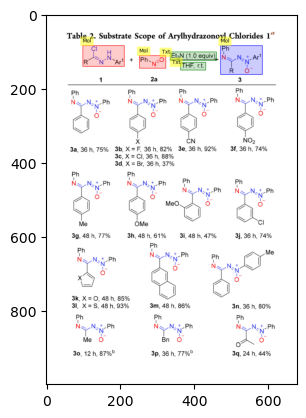

In [16]:
output = model.rxnscribe.draw_predictions(results[0]['reactions'], image_file = image_file)
plt.imshow(output[0])

{'[O-]/[N+](=N\\C(=Nc1ccccc1)c1ccccc1)c1ccccc1': ['36 h, 75%', '3a ,'], 'Cc1ccc(C(=Nc2ccccc2)/N=[N+](\\[O-])c2ccccc2)cc1': ['48 h, 77%', '39,'], 'C*1cccc1C(=Nc1ccccc1)/N=[N+](\\[O-])c1ccccc1': ['3k,X = 0, 48 h, 85%', '31', '7', 'X=S,48 h, 93%'], 'CC(=Nc1ccccc1)/N=[N+](\\[O-])c1ccccc1': ['12 h;', '87%b', '30 ,'], '*N/N=C(/*)Cl': ['1'], 'COc1ccc(C(=Nc2ccccc2)/N=[N+](\\[O-])c2ccccc2)cc1': ['3h, 48', '61%', 'h,'], '*c1ccc(C(=Nc2ccccc2)/N=[N+](\\[O-])c2ccccc2)cc1': ['3b,X=F,', '0', '36', '82%', '3c,', '0', 'X=Cl, 36 h, 88%', '3d', '', 'X =Br;', '1', '36 h, 37%', 'h,'], 'O=Nc1ccccc1': ['2a'], '[O-]/[N+](=N\\C(=Nc1ccccc1)c1ccc2ccccc2c1)c1ccccc1': ['3m_', '7', '48', '86%', 'b,'], '[O-]/[N+](=N\\C(Cc1ccccc1)=Nc1ccccc1)c1ccccc1': ['36 h,', '77%b', '3p,'], 'COc1ccccc1C(=Nc1ccccc1)/N=[N+](\\[O-])c1ccccc1': ['3i', '1', '48 h, 47%'], 'N#Cc1ccc(C(=Nc2ccccc2)/N=[N+](\\[O-])c2ccccc2)cc1': ['36 h, 92%', '3e,'], 'Cc1ccc(/[N+]([O-])=N/C(=Nc2ccccc2)c2ccccc2)cc1': ['36', '80%', '3n,', 'h,'], '*C(=Nc1ccccc1)

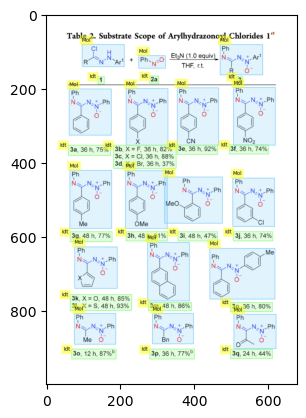

In [17]:
coref_output = model.moldet.draw_bboxes(coref_results[0], image_file = image_file, coref = True)

plt.imshow(coref_output[0])

coref_results_dict = {coref_results[0]['bboxes'][coref[0]]['smiles']: coref_results[0]['bboxes'][coref[1]]['text']  for coref in coref_results[0]['corefs']}

print(coref_results_dict)

*N/N=C(/*)Cl


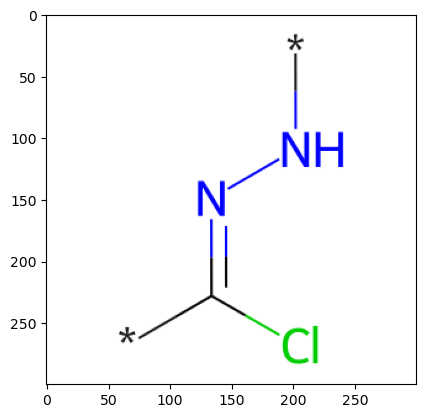

O=Nc1ccccc1


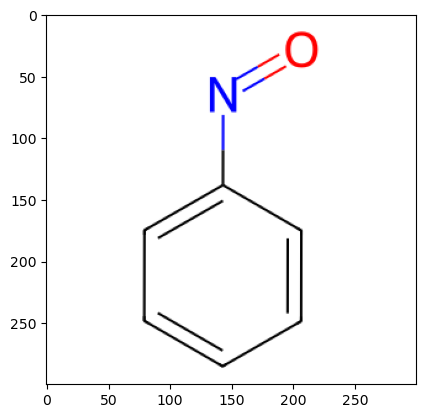

*C(=Nc1ccccc1)/N=[N+](/*)[O-]


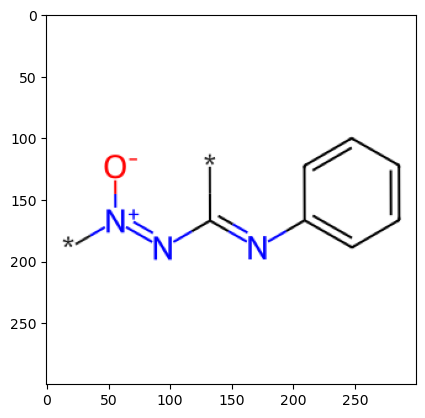

In [18]:
reactants_array = []
products = []

for reactant in results[0]['reactions'][0]['reactants']:
    print(reactant['smiles'])
    reactants_array.append(reactant['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(reactant['smiles']))
    plt.imshow(i)
    plt.show()
for product in results[0]['reactions'][0]['products']:
    print(product['smiles'])
    products.append(product['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(product['smiles']))
    plt.imshow(i)
    plt.show()

backout the reactants and do manual evaluation

In [19]:
backed_out = utils.backout(results, coref_results, model.molscribe)

In [20]:
backed_out

[(['ClC(=NNc1ccccc1)c1ccccc1', 'O=Nc1ccccc1'], '3a ,'),
 (['C*1cccc1C(Cl)=NNc1ccccc1', 'O=Nc1ccccc1'], '3k,X = 0, 48 h, 85%'),
 (['COc1ccc(C(Cl)=NNc2ccccc2)cc1', 'O=Nc1ccccc1'], '3h, 48'),
 (['Fc1ccc(C(Cl)=NNc2ccccc2)cc1', 'O=Nc1ccccc1'], '3b,X=F,'),
 (['*c1ccc(C(Cl)=NNc2ccccc2)cc1', 'O=Nc1ccccc1'], '3c,'),
 (['*c1ccc(C(Cl)=NNc2ccccc2)cc1', 'O=Nc1ccccc1'], '3d'),
 (['ClC(=NNc1ccccc1)c1ccc2ccccc2c1', 'O=Nc1ccccc1'], '3m_'),
 (['ClC(Cc1ccccc1)=NNc1ccccc1', 'O=Nc1ccccc1'], '3p,'),
 (['COc1ccccc1C(Cl)=NNc1ccccc1', 'O=Nc1ccccc1'], '3i'),
 (['N#Cc1ccc(C(Cl)=NNc2ccccc2)cc1', 'O=Nc1ccccc1'], '3e,'),
 (['Cc1ccc(NN=C(Cl)c2ccccc2)cc1', 'O=Nc1ccccc1'], '3n,'),
 (['ClC(=NNc1ccccc1)c1cccc(Cl)c1', 'O=Nc1ccccc1'], '3j, 36'),
 (['O=[N+]([O-])c1ccc(C(Cl)=NNc2ccccc2)cc1', 'O=Nc1ccccc1'], '3f,')]

these are the predicted reactants corresponding the product with label 3a ,
ClC(=NNc1ccccc1)c1ccccc1


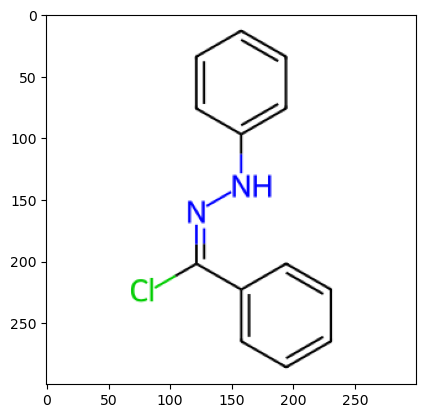

O=Nc1ccccc1


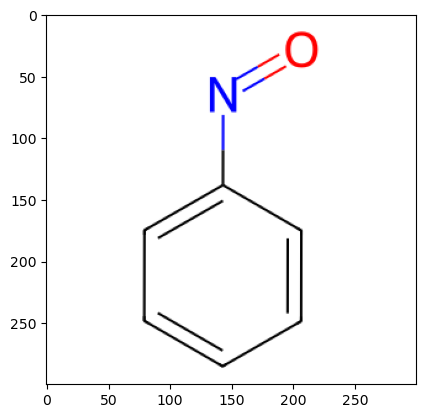

these are the predicted reactants corresponding the product with label 3k,X = 0, 48 h, 85%
C*1cccc1C(Cl)=NNc1ccccc1


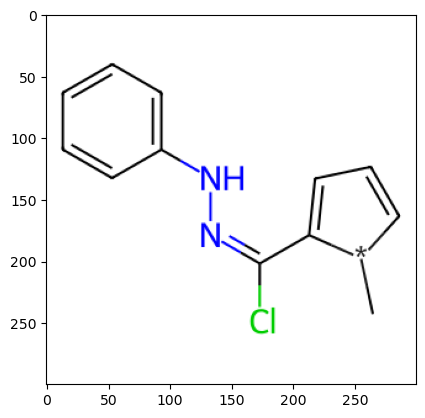

O=Nc1ccccc1


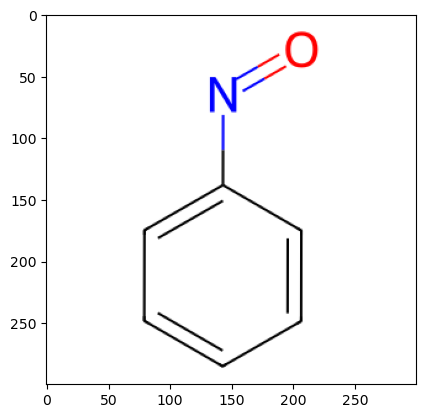

these are the predicted reactants corresponding the product with label 3h, 48
COc1ccc(C(Cl)=NNc2ccccc2)cc1


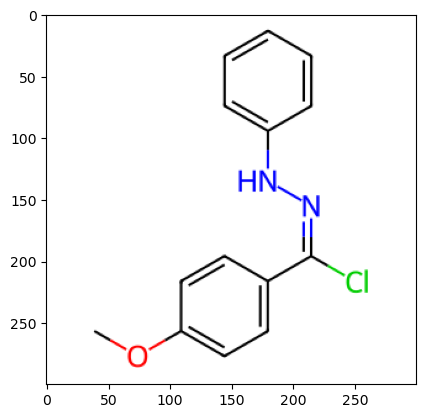

O=Nc1ccccc1


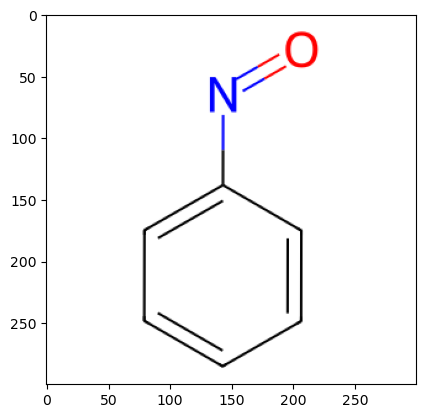

these are the predicted reactants corresponding the product with label 3b,X=F,
Fc1ccc(C(Cl)=NNc2ccccc2)cc1


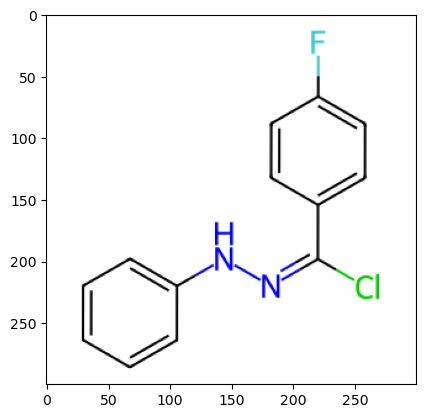

O=Nc1ccccc1


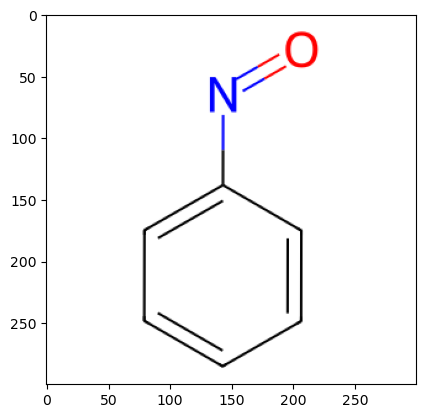

these are the predicted reactants corresponding the product with label 3c,
*c1ccc(C(Cl)=NNc2ccccc2)cc1


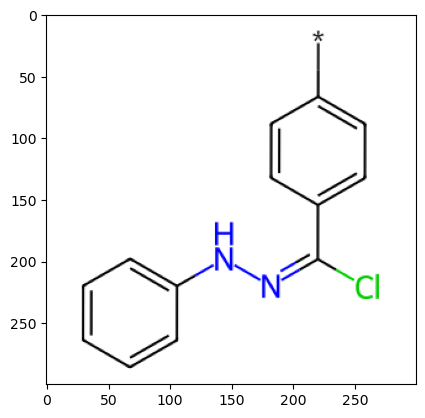

O=Nc1ccccc1


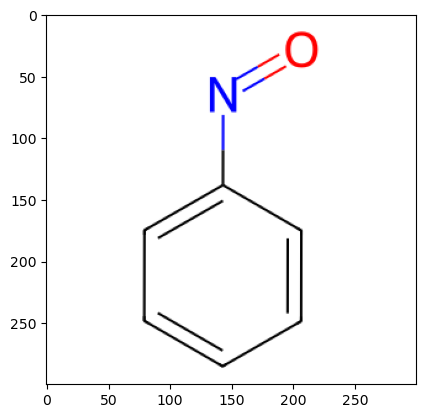

these are the predicted reactants corresponding the product with label 3d
*c1ccc(C(Cl)=NNc2ccccc2)cc1


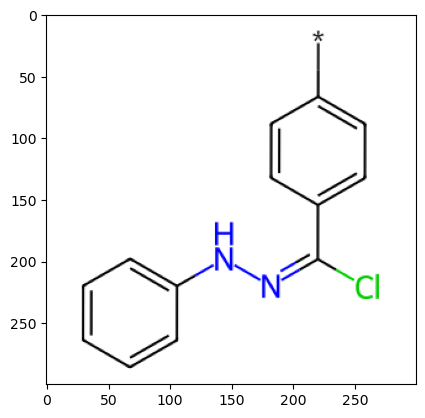

O=Nc1ccccc1


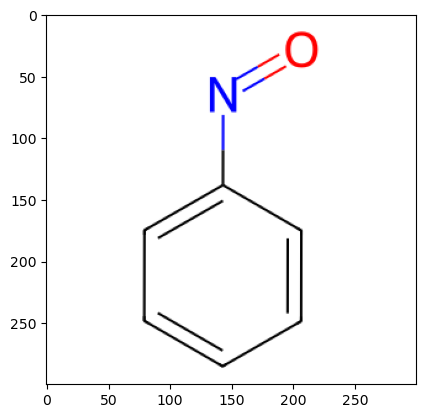

these are the predicted reactants corresponding the product with label 3m_
ClC(=NNc1ccccc1)c1ccc2ccccc2c1


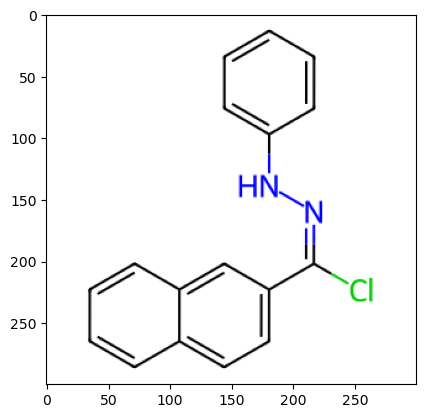

O=Nc1ccccc1


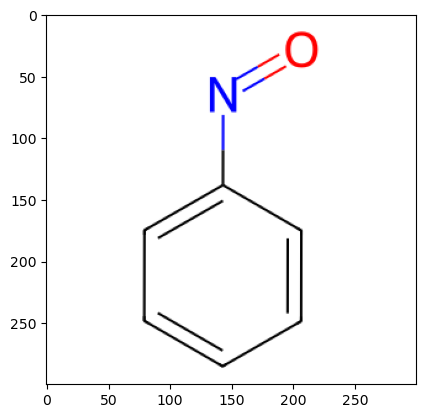

these are the predicted reactants corresponding the product with label 3p,
ClC(Cc1ccccc1)=NNc1ccccc1


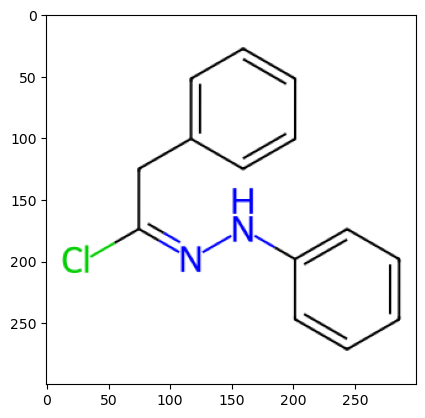

O=Nc1ccccc1


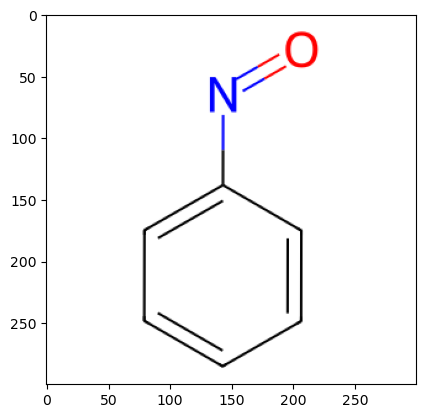

these are the predicted reactants corresponding the product with label 3i
COc1ccccc1C(Cl)=NNc1ccccc1


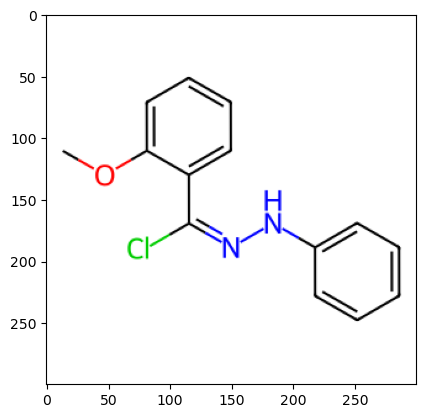

O=Nc1ccccc1


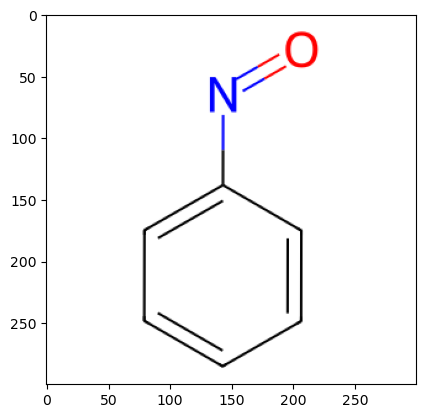

these are the predicted reactants corresponding the product with label 3e,
N#Cc1ccc(C(Cl)=NNc2ccccc2)cc1


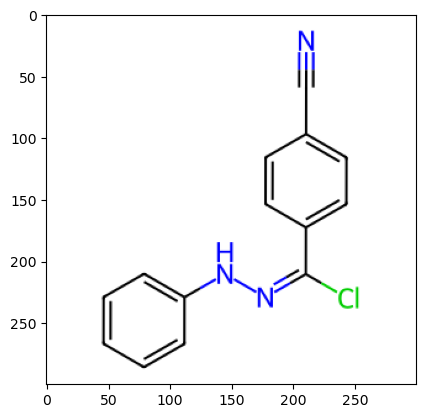

O=Nc1ccccc1


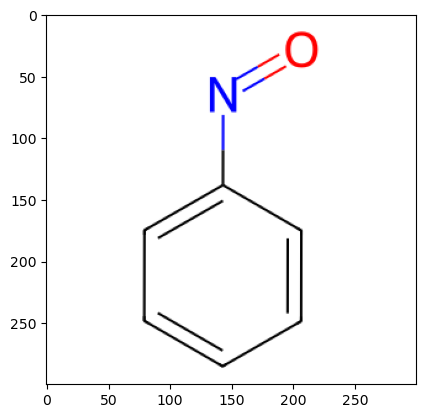

these are the predicted reactants corresponding the product with label 3n,
Cc1ccc(NN=C(Cl)c2ccccc2)cc1


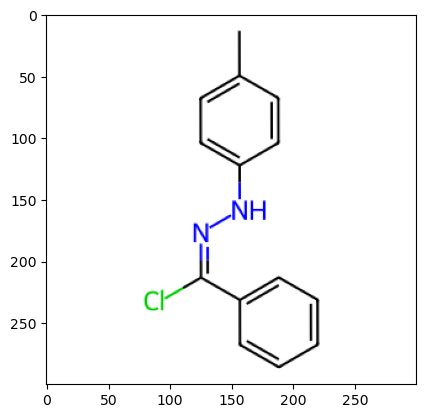

O=Nc1ccccc1


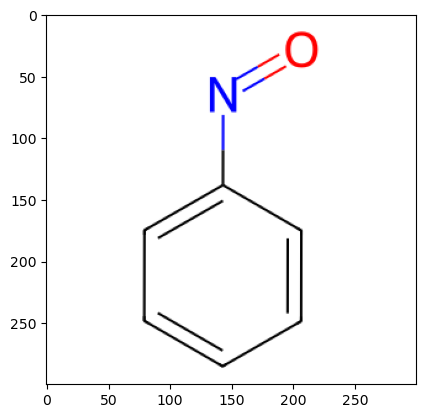

these are the predicted reactants corresponding the product with label 3j, 36
ClC(=NNc1ccccc1)c1cccc(Cl)c1


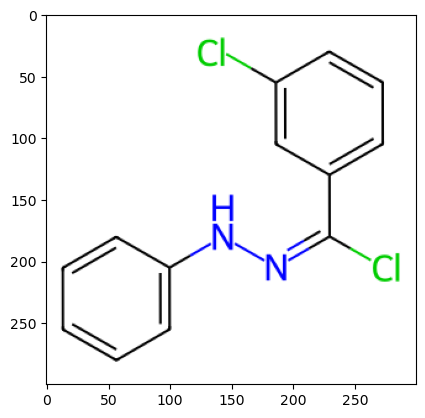

O=Nc1ccccc1


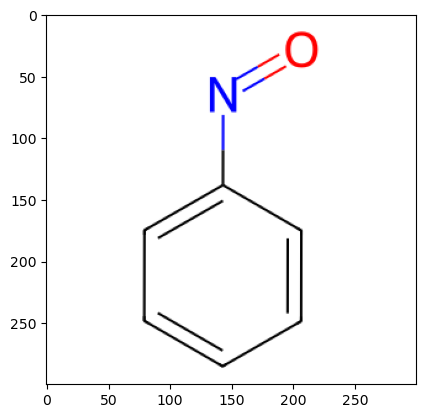

these are the predicted reactants corresponding the product with label 3f,
O=[N+]([O-])c1ccc(C(Cl)=NNc2ccccc2)cc1


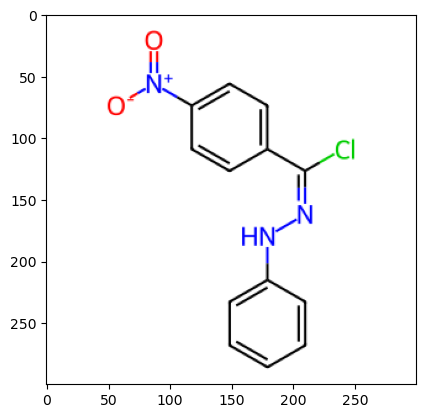

O=Nc1ccccc1


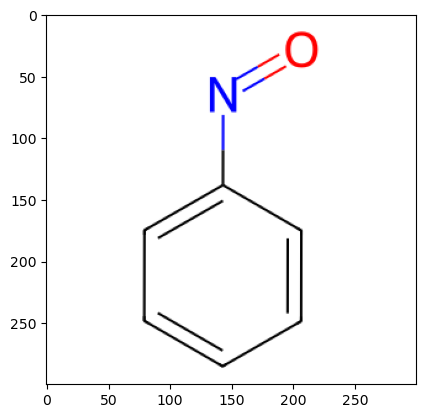

In [21]:
extracted_reactants = {}

for reactants, _, label in backed_out:
    print(f'these are the predicted reactants corresponding the product with label {label}')
    extracted_reactants[label] = []
    for molecule in reactants:
        print(molecule)
        extracted_reactants[label].append(molecule)
        i = Draw.MolToImage(Chem.MolFromSmiles(molecule))
        plt.imshow(i)
        plt.show()